In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
file_path = "/content/sample_data/housing.csv"

In [ ]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data.head(n=10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# **Missing Data Analysis**

In [ ]:
#Checking for missing values
missing_values = data.isnull().sum()
missing_values

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#Calculate the percentage of missing data in each column
missing_percentage = (missing_values/len(data)) * 100
#Displaying the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
#Removing rows with missing values
data_cleaned = data.dropna()
#Verifying missing values have been removed
print('\n Missing values in each column afer removal:')
data_cleaned.isnull().sum()


 Missing values in each column afer removal:


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# **Data Exploration and Visualization**

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


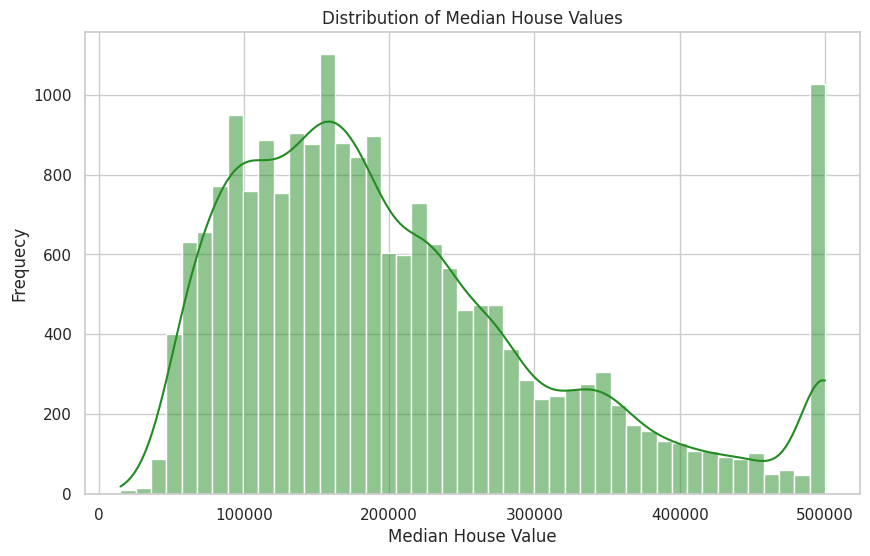

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequecy')
plt.show()

# **Removing Outliers using InterQuantile Range**

In [ ]:
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
#Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Removing outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

#shape of data before and removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


# **BoxPlot for Outlier Detection**

## **Outlier in Median Income**

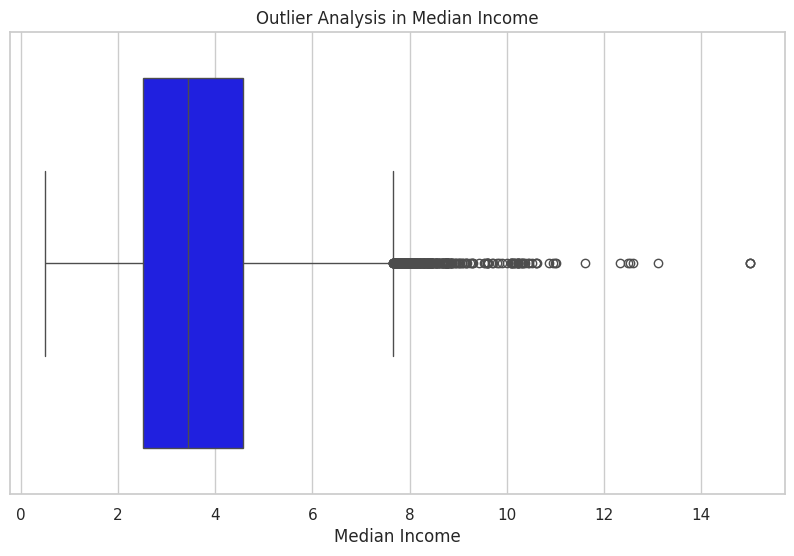

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = data_no_outliers_1['median_income'], color = 'blue')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()


In [ ]:
#Calculating Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
print(Q1)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

#Defining the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Removing outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

#shape of data before and removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("New data shape without outliers:", data_no_outliers_2.shape)

2.5223
4.5724
Original data shape: (19369, 10)
New data shape without outliers: (19026, 10)


In [ ]:
data = data_no_outliers_2

# **Correlation Analysis - HeatMap**

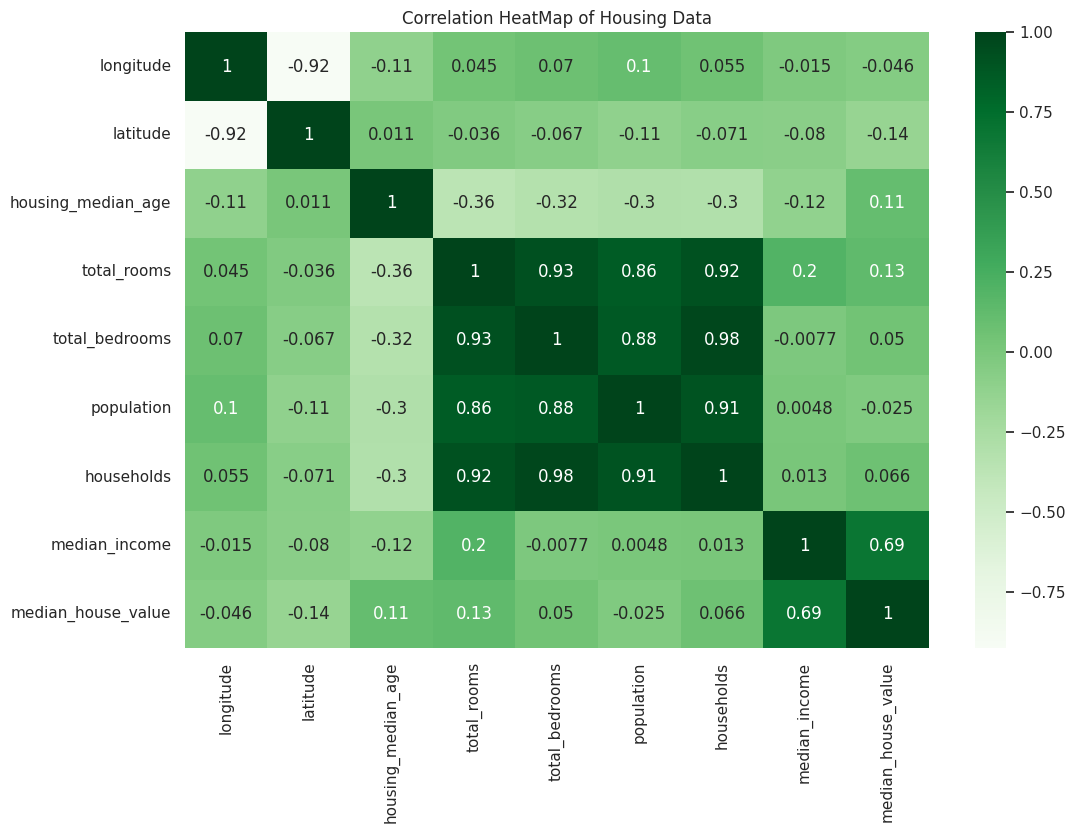

In [ ]:
# Removing the 'ocean_proximity' column
#data_numeric = data.drop('ocean_proximity', axis=1)

# Displaying the first few rows of the new DataFrame to verify
#display(data_numeric.head())
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop('ocean_proximity', axis = 1).corr(), annot = True, cmap = 'Greens')
plt.title('Correlation HeatMap of Housing Data')
plt.show()

In [ ]:
data = data.drop('total_bedrooms', axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

**String Data Categorization to Dummy Variables**

In [ ]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop('ocean_proximity', axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data = data.drop('ocean_proximity_ISLAND', axis = 1)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


**Splitting data into Train/Test**

In [ ]:
#Feature Definition (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

X = data[features]
y = data[target]


#Splitting data into training set and testing data set
#test_size specifies the proportion of the data to be included in the test split
#random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

#checking the size of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Testing set size: 4128 samples


# **Traning**

In [ ]:
#Adding a constant to the predictors since statsmodels OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)

# Converting boolean columns to integers
for col in X_train_const.columns:
    if X_train_const[col].dtype == 'bool':
        X_train_const[col] = X_train_const[col].astype(int)

#Fitting the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

#Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.543e+32
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:19:36   Log-Likelihood:             3.4949e+05
No. Observations:               16512   AIC:                        -6.989e+05
Df Residuals:                   16499   BIC:                        -6.988e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction/Testing

In [ ]:
#Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

#Making Predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

,0
11272,187500.0
9930,269900.0
18327,500001.0
3377,175000.0
15629,250000.0
...,...
5254,500001.0
3259,98900.0
6517,155400.0
17515,292200.0


# Checking OLS Assumptions

**Assumption 1: Linearity**

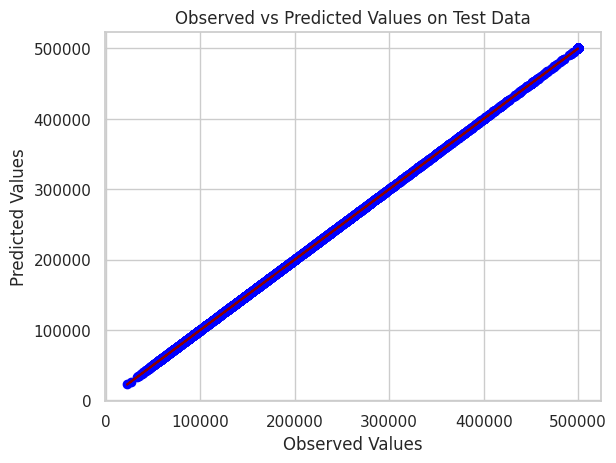

In [ ]:
#scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = 'blue')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color = 'darkred') #line for perfect prediction (true values)
plt.show()

**Assumption 2: Random Sample**

In [ ]:
#calculating the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)
print(f"Mean of Residuals: {np.round(mean_residuals, 2)}")

Mean of Residuals: 0.0


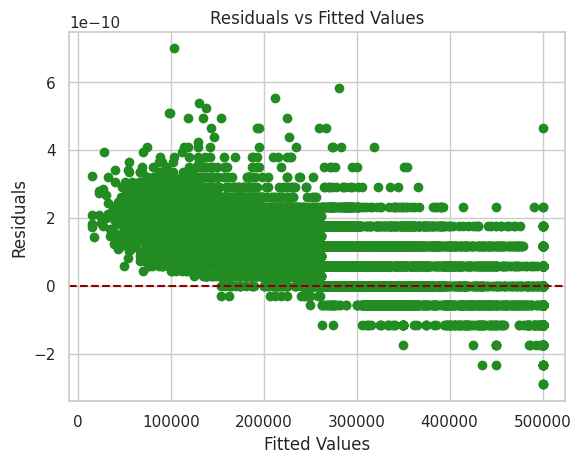

In [ ]:
#plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = 'forestgreen')
plt.axhline(y = 0, color = 'darkred', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Assumption 3: Exogeneity**

In [ ]:
#calculating the residuals
residuals = model_fitted.resid
#checking for correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column], residuals)[0,1]
  print(f'Correlation between {column} and residuals: {np.round(corr_coefficient, 2)}')


Correlation between longitude and residuals: -0.15
Correlation between latitude and residuals: 0.3
Correlation between housing_median_age and residuals: -0.09
Correlation between total_rooms and residuals: 0.22
Correlation between population and residuals: 0.27
Correlation between households and residuals: 0.27
Correlation between median_income and residuals: -0.33
Correlation between median_house_value and residuals: -0.68
Correlation between ocean_proximity_<1H OCEAN and residuals: -0.68
Correlation between ocean_proximity_INLAND and residuals: 0.57
Correlation between ocean_proximity_NEAR BAY and residuals: 0.24
Correlation between ocean_proximity_NEAR OCEAN and residuals: -0.01


**Assumption 4: Homoskedasticity**

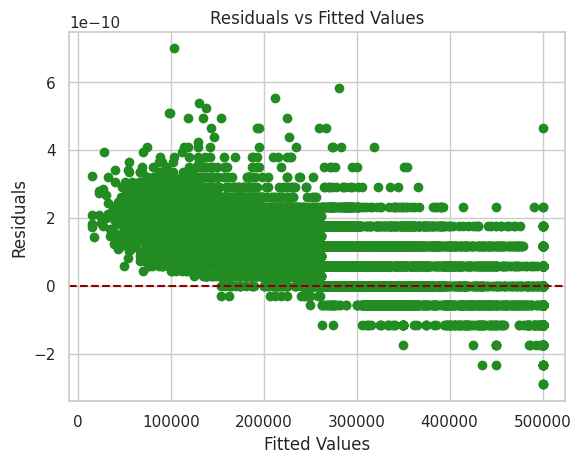

In [ ]:
#plotting residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = 'forestgreen')
plt.axhline(y = 0, color = 'darkred', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
#Initializing the StandardScaler
scaler = StandardScaler()

#Fitting the scaler on the training data to transform it
X_train_scaled = scaler.fit_transform(X_train)

#Applying the same transformation to the test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.79858647, -0.87126393,  0.19645682, ..., -0.6796218 ,
        -0.35326426, -0.3846325 ],
       [-1.36581003,  1.23325031, -1.14867123, ..., -0.6796218 ,
         2.83074203, -0.3846325 ],
       [-1.27624879,  0.84594503,  1.85808559, ..., -0.6796218 ,
         2.83074203, -0.3846325 ],
       ...,
       [ 0.78365959, -0.74060673, -0.19916908, ...,  1.4714066 ,
        -0.35326426, -0.3846325 ],
       [-1.16678506,  0.78528276,  1.22508415, ..., -0.6796218 ,
        -0.35326426, -0.3846325 ],
       [ 0.25126781, -0.13865033, -0.67392016, ...,  1.4714066 ,
        -0.35326426, -0.3846325 ]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

#creating and fitting the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#making predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

#calculating MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
#Output of the performance metrics
print(f'RMSE on Test Set: {np.round(rmse, 2)}')



RMSE on Test Set: 0.0


In [ ]:
print(y_pred)
print(y_test)

[[187500.]
 [269900.]
 [500001.]
 ...
 [155400.]
 [292200.]
 [176300.]]
       median_house_value
11272            187500.0
9930             269900.0
18327            500001.0
3377             175000.0
15629            250000.0
...                   ...
5254             500001.0
3259              98900.0
6517             155400.0
17515            292200.0
2970             176300.0

[4128 rows x 1 columns]
